In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def process_time_file(path):
    data = pd.read_csv(path,header=None)
    names = data[0].unique()
    agg_times = {}
    for name in names:
        agg_times[name] = data[data[0]==name][1].sum()
    agg_times['DATALOADER'] /=8 #divide by number of dataloader threadss
    fig1, ax1 = plt.subplots()
    ax1.pie(agg_times.values(), labels=agg_times.keys(), autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    
    for key,value in agg_times.items():
        print(f'{key}:{value} s')
    print(f'Total: {sum(agg_times.values())} s')
    print(f'Total: {sum(agg_times.values())/3600} hrs')


With rank acc


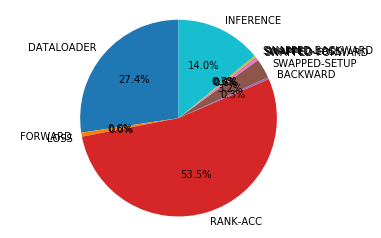

DATALOADER:467.2133375 s
FORWARD:10.6676 s
LOSS:0.5784 s
RANK-ACC:912.5777 s
BACKWARD:5.2890999999999995 s
SWAPPED-SETUP:55.356 s
SWAPPED-FORWARD:10.0991 s
SWAPPED-LOSS:0.5556 s
SWAPPED-BACKWARD:4.8564 s
INFERENCE:239.663 s
Total: 1706.8562374999997 s
Total: 0.4741267326388888 hrs


In [29]:
%matplotlib inline
print('With rank acc')
process_time_file('logs/wealthy-18-10-2019.log')

Without rank acc


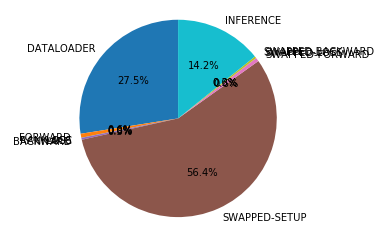

DATALOADER:376.8058 s
FORWARD:8.735700000000001 s
LOSS:0.47530000000000006 s
RANK-ACC:0.0 s
BACKWARD:4.2382 s
SWAPPED-SETUP:773.0686000000001 s
SWAPPED-FORWARD:8.0145 s
SWAPPED-LOSS:0.4567 s
SWAPPED-BACKWARD:4.1927 s
INFERENCE:194.63419999999996 s
Total: 1370.6217000000001 s
Total: 0.38072825000000005 hrs


In [30]:
print('Without rank acc')
process_time_file('logs/boring-18-10-2019.log')